In [1]:
from tensorflow import keras
from keras import Sequential, layers, models
from keras.layers import Dense, Flatten

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train), (x_test,y_test) = keras.datasets.cifar10.load_data()

In [4]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [5]:
classes = ['airplane', 'automobiles', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
def plot_by_index(index):
    plt.imshow(x_train[index])
    plt.title(classes[y_train[index]])
    plt.show()

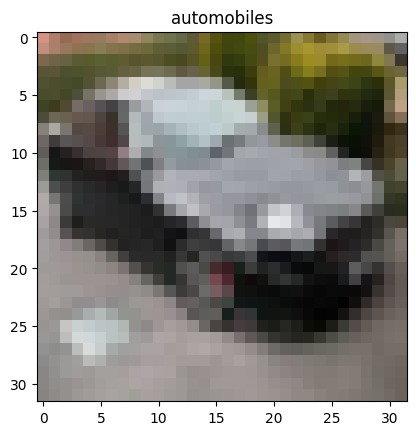

In [7]:
plot_by_index(578)

In [8]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [9]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
from keras.callbacks import EarlyStopping

In [11]:
callback = EarlyStopping(monitor='val_loss', verbose=1)

In [12]:
history = cnn.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_test_scaled, y_test), callbacks=callback)

Epoch 1/10


1563/1563 [==============================] - 26s 15ms/step - loss: 1.4979 - accuracy: 0.4570 - val_loss: 1.2385 - val_accuracy: 0.5594
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.1254 - accuracy: 0.6037 - val_loss: 1.0734 - val_accuracy: 0.6212
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9826 - accuracy: 0.6552 - val_loss: 0.9488 - val_accuracy: 0.6666
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8957 - accuracy: 0.6875 - val_loss: 0.9924 - val_accuracy: 0.6568
Epoch 4: early stopping


In [21]:
cnn_log = cnn.predict(x_test_scaled)

313/313 [==============================] - 2s 5ms/step


In [23]:
cnn_pred = cnn_log.argmax(axis=1)

In [24]:
cnn_pred

array([3, 8, 8, ..., 2, 1, 7], dtype=int64)

In [27]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [28]:
from sklearn.metrics import accuracy_score, classification_report

In [29]:
print(classification_report(y_test,cnn_pred))

              precision    recall  f1-score   support

           0       0.75      0.70      0.73      1000
           1       0.83      0.75      0.79      1000
           2       0.61      0.55      0.58      1000
           3       0.48      0.62      0.54      1000
           4       0.62      0.69      0.65      1000
           5       0.71      0.49      0.58      1000
           6       0.80      0.76      0.78      1000
           7       0.72      0.76      0.74      1000
           8       0.85      0.75      0.79      1000
           9       0.67      0.85      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

